In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [3]:
raw_df = pd.read_csv('./emails.csv')
raw_df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
print("col 0 = {}\ncol -1 = {}".format(raw_df.columns[0],raw_df.columns[-1]))

col 0 = Email No.
col -1 = Prediction


Assign X, Y dataframe

In [6]:
raw_x = raw_df.copy().drop(columns=[raw_df.columns[0],raw_df.columns[-1]])
raw_y = raw_df['Prediction'].copy()
raw_x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# 0 = not spam, 1 = spam
raw_y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

#find nan value in columns
col_nan = [col for col in raw_x.columns if any(raw_x[col].isna())]
col_nan

### Prepare Y

In [8]:
#check if columns have nan values
for i in raw_df.columns[1:]:
    if any(raw_df[i].isna()): print("col = {} has NaN value".format(i))
    if any(raw_df[i].isnull()): print("col = {} has Null value".format(i))

In [9]:
raw_df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [10]:
print("x axis: {}\ny axis:\n{}".format(raw_y.unique(),raw_y.value_counts()))

x axis: [0 1]
y axis:
0    3672
1    1500
Name: Prediction, dtype: int64


In [11]:
#Visualize bar graph of number of samples for spam prediction
fig = px.bar(data_frame=raw_y,x=raw_y.unique(),y=raw_y.value_counts(),color=raw_y.value_counts(),range_y=[0.0,5200])
fig.show()

### Prepare X

In [12]:
#Standardized data
scaled_x = StandardScaler().fit_transform(raw_x)
df_std_x = pd.DataFrame(data=scaled_x, columns=raw_x.columns)
df_std_x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,-0.565449,-0.649083,-0.293895,-0.508752,-0.667663,-0.421725,-0.611169,-0.571751,-0.290556,-0.549800,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
1,0.115757,0.714508,1.337337,0.483741,0.614369,-0.100659,0.530831,-0.339949,3.584743,0.383809,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.030672,-0.070971
2,-0.565449,-0.649083,-0.293895,-0.508752,-0.667663,-0.421725,-0.542649,-0.571751,-0.290556,-0.342331,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
3,-0.565449,-0.124625,1.195490,-0.508752,0.400697,-0.261192,-0.051589,-0.108147,1.144740,-0.497933,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
4,0.030606,-0.019733,0.840875,-0.343336,0.400697,-0.100659,0.016931,-0.571751,1.001210,-0.394198,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.030672,-0.070971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,-0.395148,-0.439299,-0.222972,-0.012505,-0.667663,-0.421725,-0.268569,-0.571751,-0.290556,-0.290464,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
5168,2.414828,2.182990,0.415336,-0.177921,0.614369,0.380940,1.090411,0.355457,0.140033,0.643145,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.030672,-0.070971
5169,-0.565449,-0.649083,-0.293895,-0.343336,-0.667663,-0.421725,-0.508389,-0.571751,-0.290556,-0.497933,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
5170,-0.395148,0.085158,-0.293895,-0.508752,-0.240319,-0.261192,-0.314249,-0.108147,-0.290556,-0.134863,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.030672,-0.070971


In [13]:
df_std_x.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
count,5172.000000,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,...,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03,5.172000e+03
mean,0.000000,4.671008e-17,2.747652e-17,-2.198121e-17,-8.242955e-18,-4.121478e-17,2.747652e-17,2.747652e-17,5.495303e-18,-3.022417e-17,...,-6.869129e-18,-5.495303e-18,-1.373826e-17,-2.060739e-17,4.293206e-18,5.495303e-18,4.121478e-18,-1.373826e-17,-1.099061e-17,-1.648591e-17
std,1.000097,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,...,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00
min,-0.565449,-6.490826e-01,-2.938948e-01,-5.087516e-01,-6.676632e-01,-4.217254e-01,-6.340085e-01,-5.717513e-01,-2.905558e-01,-5.497998e-01,...,-2.919020e-02,-4.752477e-02,-6.294447e-02,-9.113820e-02,-1.721366e-01,-4.419738e-02,-4.732990e-02,-5.628530e-02,-3.290485e-01,-7.097072e-02
25%,-0.565449,-5.441910e-01,-2.938948e-01,-5.087516e-01,-4.539911e-01,-4.217254e-01,-4.969685e-01,-5.717513e-01,-2.905558e-01,-4.979326e-01,...,-2.919020e-02,-4.752477e-02,-6.294447e-02,-9.113820e-02,-1.721366e-01,-4.419738e-02,-4.732990e-02,-5.628530e-02,-3.290485e-01,-7.097072e-02
50%,-0.309997,-3.344078e-01,-2.938948e-01,-3.433362e-01,-2.403191e-01,-2.611923e-01,-3.142486e-01,-3.399493e-01,-2.905558e-01,-2.904640e-01,...,-2.919020e-02,-4.752477e-02,-6.294447e-02,-9.113820e-02,-1.721366e-01,-4.419738e-02,-4.732990e-02,-5.628530e-02,-3.290485e-01,-7.097072e-02
75%,0.115757,8.515850e-02,-8.112550e-02,-1.250530e-02,1.870250e-01,-1.006591e-01,7.688625e-02,1.236546e-01,-1.470262e-01,7.260598e-02,...,-2.919020e-02,-4.752477e-02,-6.294447e-02,-9.113820e-02,-1.721366e-01,-4.419738e-02,-4.732990e-02,-5.628530e-02,3.067224e-02,-7.097072e-02
max,17.316215,1.319661e+01,2.403273e+01,1.421322e+01,9.374923e+00,1.193933e+01,2.104114e+01,1.565439e+01,2.367888e+01,1.101657e+01,...,5.203001e+01,3.776757e+01,3.499616e+01,1.704947e+01,2.089983e+01,3.112701e+01,2.875152e+01,4.153051e+01,4.067911e+01,4.071354e+01


## Train-test-split data

In [14]:
rseed = 42
x_train, x_test, y_train, y_test = train_test_split(df_std_x, raw_y, test_size=0.3, random_state=rseed)

# Model Parameter Tuning

In [ ]:
#Create Parameter for Random Forest
nEst = [100, 500, 1000, 2000]
ASM_function = ['entropy', 'gini', 'log_loss']
maxF = ['sqrt', 'log2', None]
minSample = [1, 2, 4]
maxD = [None]

RF_param = dict(n_estimators = nEst, 
criterion = ASM_function, 
max_depth = maxD, 
min_samples_leaf = minSample, 
max_features = maxF, random_state = [rseed])

In [ ]:
#Tuning parameter with GridSearchCV
nJob = -1 #Numbers of job run in parallel
vb = 10 #Control verbosity
cv = 5 #Numbers of cross-validation

grid = GridSearchCV(estimator = RandomForestClassifier(), n_jobs = nJob, verbose = vb, scoring = 'accuracy', cv = cv, param_grid = RF_param)
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
#Show score
print("Best params:",grid_result.best_params_)
print("Best score:",grid_result.best_score_, end="\n\n")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r"%(mean,stdev,param))

Best params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 2000, 'random_state': 42}
Best score: 0.9726519337016575

0.965470 (0.005455) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 42}
0.970442 (0.004988) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 42}
0.971547 (0.005357) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 42}
0.972652 (0.004655) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 2000, 'random_state': 42}
0.965746 (0.005886) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 42}
0.969613 (0.005241) with: {'cr

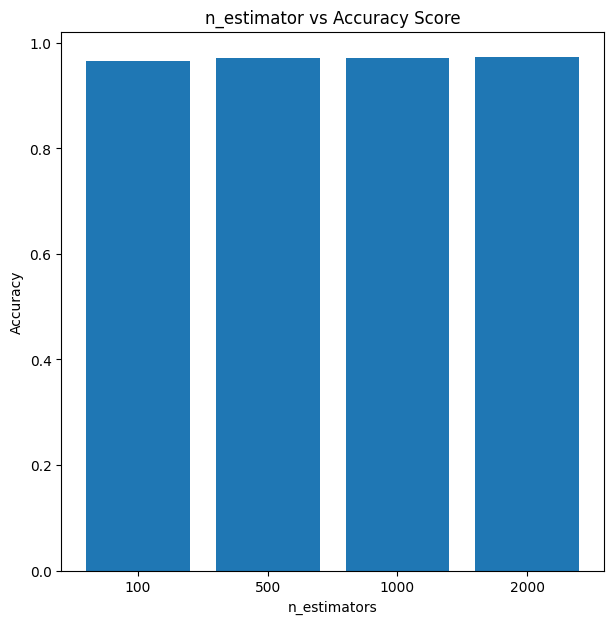

[0.9654696132596685, 0.9704419889502762, 0.9715469613259667, 0.9726519337016575]


In [ ]:
#Show accuracy score of all n_estimators
acc = [means[0], means[1], means[2], means[3]]

plt.figure(figsize = (7,7))
plt.bar(x=['100', '500', '1000', '2000'], height=acc)

plt.title(label = 'n_estimator vs Accuracy Score')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

plt.show()

print(acc)

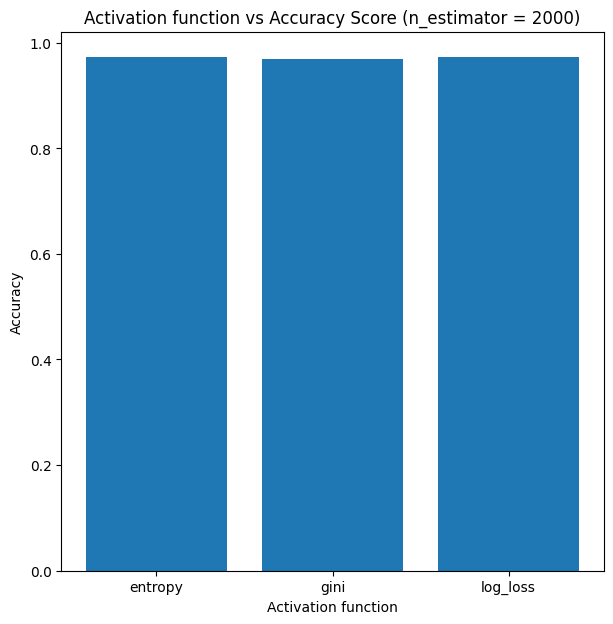

[0.9726519337016575, 0.9698895027624308, 0.9726519337016575]


In [ ]:
#Show accuracy score of all Activation function
acc = [means[3], means[39], means[75]]

plt.figure(figsize = (7,7))
plt.bar(x=ASM_function, height=acc)

plt.title(label = 'Activation function vs Accuracy Score (n_estimator = 2000)')
plt.xlabel('Activation function')
plt.ylabel('Accuracy')

plt.show()

print(acc)

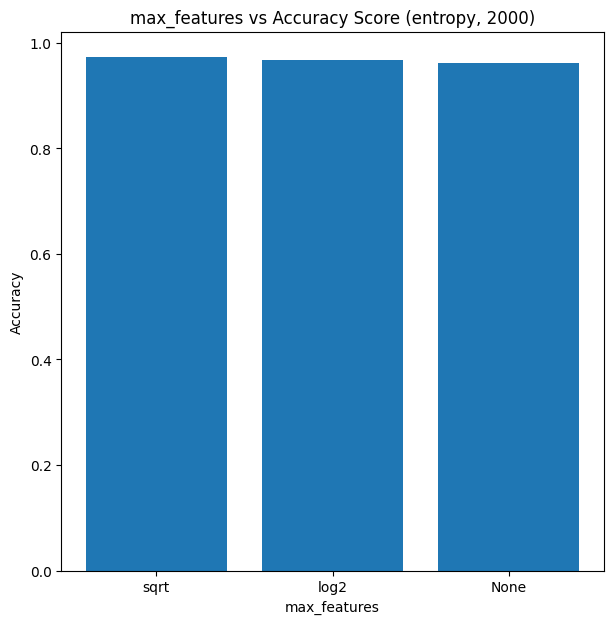

[0.9726519337016575, 0.9679558011049725, 0.961049723756906]


In [ ]:
#Show accuracy score of all max_features
acc = [means[3], means[15], means[27]]

plt.figure(figsize = (7,7))
plt.bar(x=['sqrt', 'log2', 'None'], height=acc)

plt.title(label = 'max_features vs Accuracy Score (entropy, 2000)')
plt.xlabel('max_features')
plt.ylabel('Accuracy')

plt.show()

print(acc)

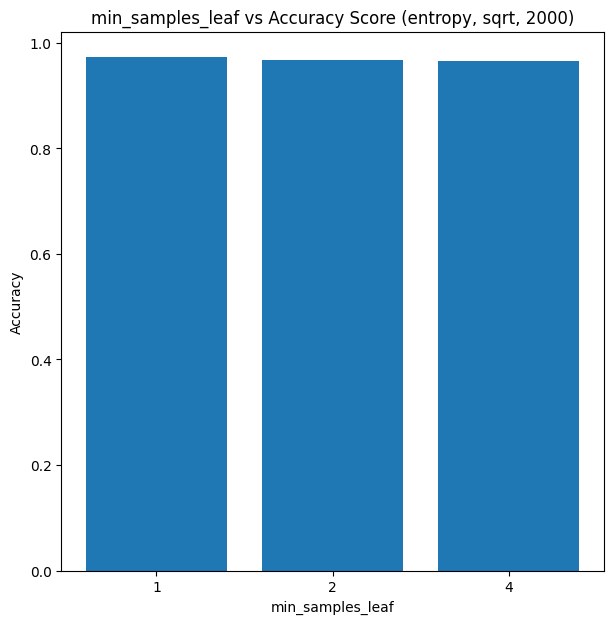

[0.9726519337016575, 0.968232044198895, 0.9662983425414364]


In [ ]:
#Show accuracy score of all min_samples_leaf
acc = [means[3], means[7], means[11]]

plt.figure(figsize = (7,7))
plt.bar(x=['1', '2', '4'], height=acc)

plt.title(label = 'min_samples_leaf vs Accuracy Score (entropy, sqrt, 2000)')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')

plt.show()

print(acc)

In [ ]:
#Choose best parameter to create Random Forest
RFModel = RandomForestClassifier(n_estimators=2000, criterion='entropy', max_depth=None, min_samples_leaf=1, max_features='sqrt', random_state=rseed)

In [ ]:
#Train and test model
RFModel.fit(x_train, y_train)
y_pred = RFModel.predict(x_test)

#Print confusion matrix and classification report
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print("------------------------------")
print('Classification Report: ')
print(classification_report(y_test, y_pred))

Confusion Matrix
[[1074   23]
 [   8  447]]
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1097
           1       0.95      0.98      0.97       455

    accuracy                           0.98      1552
   macro avg       0.97      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552



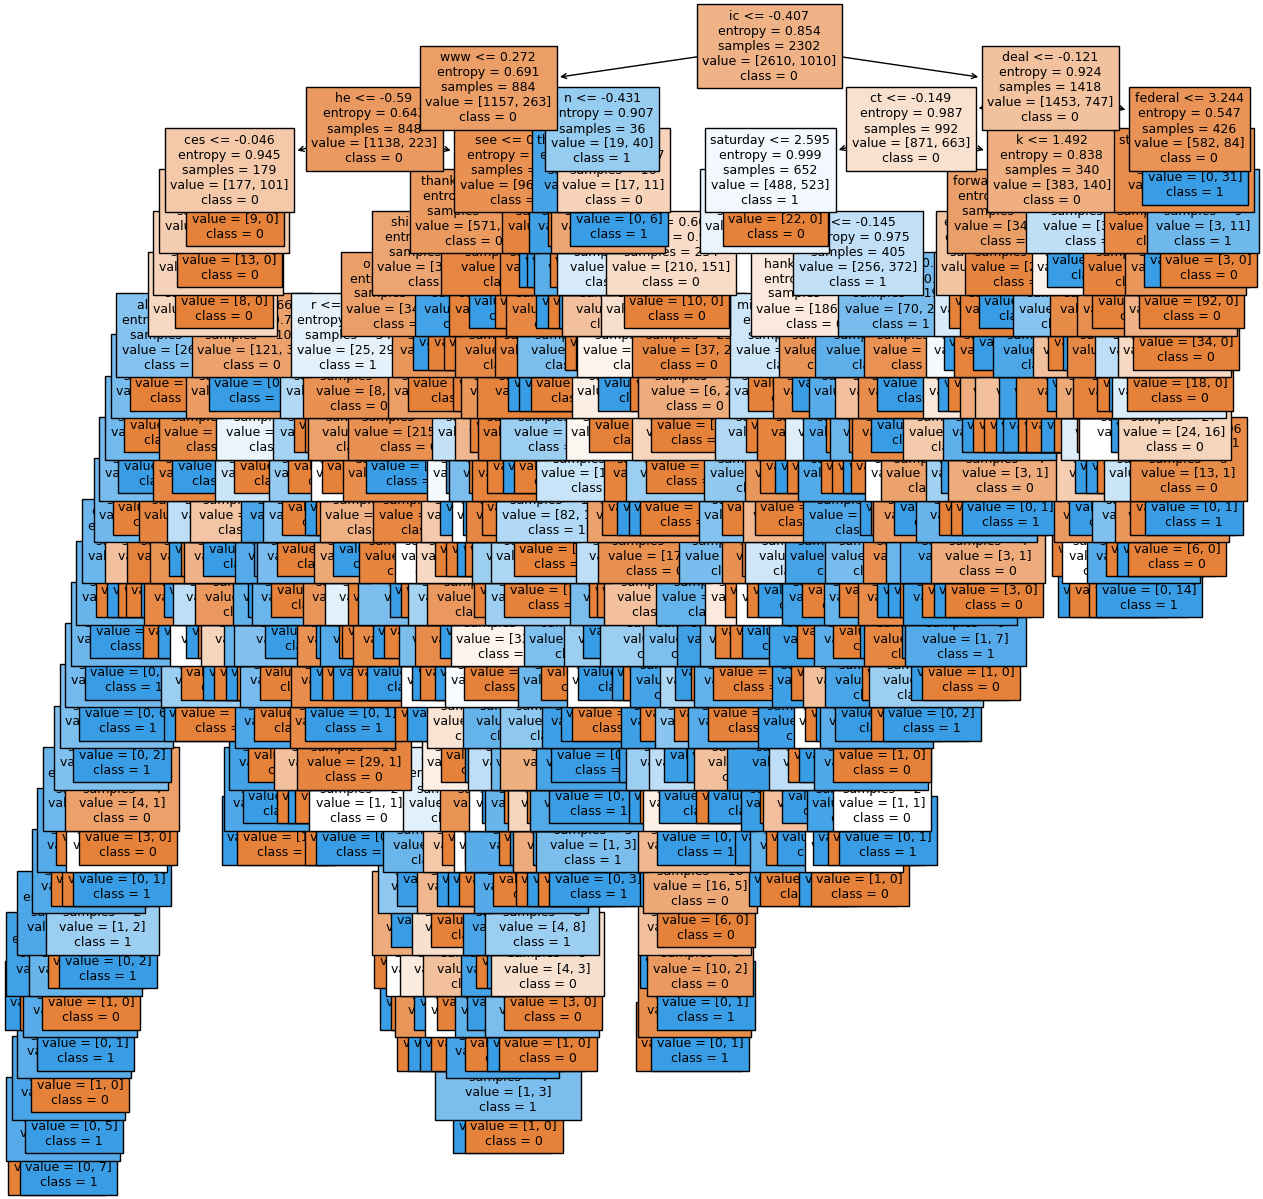

In [ ]:
#Show tree structure of Random Forest
feature_names = x_train.columns
Labels = np.unique(y_train).astype('str')

plt.figure(figsize = (15,15))
tree.plot_tree(RFModel.estimators_[0], feature_names = feature_names, class_names = Labels, filled = True, fontsize = 9)
plt.show()

# Test Model

## Test data preparation

In [15]:
#Read test datatset
df_test = pd.read_csv("./Test_dataset.csv")
df_test

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,2,1,0,1,0,17,2,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,25,2,19,7,12,157,11,4,32,...,0,0,0,0,0,0,0,2,0,0
3,1,1,0,0,1,0,34,0,1,7,...,0,0,0,0,0,0,0,2,0,1
4,3,3,0,1,0,0,17,1,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,3,2,1,0,1,0,15,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5167,4,7,1,4,3,0,40,1,0,8,...,0,0,0,0,0,0,0,0,0,0
5168,1,2,1,0,1,0,20,1,1,6,...,0,0,0,0,0,0,0,1,0,0
5169,8,0,0,2,2,0,25,1,1,6,...,0,0,0,1,0,0,0,1,0,0


In [16]:
df_test_x = df_test.drop(columns='Prediction')
df_test_x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,1,2,1,0,1,0,17,2,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,25,2,19,7,12,157,11,4,32,...,0,0,0,0,0,0,0,0,2,0
3,1,1,0,0,1,0,34,0,1,7,...,0,0,0,0,0,0,0,0,2,0
4,3,3,0,1,0,0,17,1,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,3,2,1,0,1,0,15,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5167,4,7,1,4,3,0,40,1,0,8,...,0,0,0,0,0,0,0,0,0,0
5168,1,2,1,0,1,0,20,1,1,6,...,0,0,0,0,0,0,0,0,1,0
5169,8,0,0,2,2,0,25,1,1,6,...,0,0,0,0,1,0,0,0,1,0


In [18]:
test_scaled_x = StandardScaler().fit(raw_x).transform(df_test_x)
df_test_std_x = pd.DataFrame(data=test_scaled_x, columns=df_test_x.columns)
df_test_std_x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,-0.480298,-0.439299,-0.293895,-0.508752,-0.453991,-0.421725,-0.439869,-0.108147,-0.290556,-0.446065,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
1,-0.565449,-0.649083,-0.364818,-0.508752,-0.667663,-0.421725,-0.611169,-0.571751,-0.290556,-0.549800,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
2,2.329677,1.973207,-0.222972,2.634142,0.828041,1.504672,1.158931,1.978070,0.283563,1.109949,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.390393,-0.070971
3,-0.480298,-0.544191,-0.364818,-0.508752,-0.453991,-0.421725,-0.245729,-0.571751,-0.147026,-0.186730,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.390393,-0.070971
4,-0.309997,-0.334408,-0.364818,-0.343336,-0.667663,-0.421725,-0.439869,-0.339949,-0.290556,-0.342331,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,-0.309997,-0.439299,-0.293895,-0.508752,-0.453991,-0.421725,-0.462709,-0.571751,-0.147026,-0.549800,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
5167,-0.224846,0.085158,-0.293895,0.152910,-0.026647,-0.421725,-0.177209,-0.339949,-0.290556,-0.134863,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971
5168,-0.480298,-0.439299,-0.293895,-0.508752,-0.453991,-0.421725,-0.405609,-0.339949,-0.147026,-0.238597,...,-0.02919,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.030672,-0.070971
5169,0.115757,-0.649083,-0.364818,-0.177921,-0.240319,-0.421725,-0.348509,-0.339949,-0.147026,-0.238597,...,-0.02919,-0.047525,-0.062944,-0.091138,1.583861,-0.044197,-0.04733,-0.056285,0.030672,-0.070971


In [17]:
df_test_y = df_test['Prediction']
df_test_y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: Prediction, Length: 5171, dtype: int64

## Random Forest

In [22]:
#Create test Random Forest model
import time

start_time = time.time()

testRF = RandomForestClassifier(n_estimators=2000, criterion='entropy',
max_depth=None, min_samples_leaf=1, max_features='sqrt', random_state=rseed)
testRF.fit(df_std_x, raw_y)

print("--- %s seconds ---" % (time.time() - start_time))

--- 73.49343609809875 seconds ---


In [23]:
#Test model
start_time = time.time()

y_test_pred = testRF.predict(df_test_std_x)
y_test_pred

print("--- %s seconds ---" % (time.time() - start_time))

--- 2.7609963417053223 seconds ---


In [24]:
#Print confusion matrix and classification report
print('Confusion Matrix')
print(confusion_matrix(df_test_y, y_test_pred))
print("------------------------------")
print('Classification Report: ')
print(classification_report(df_test_y, y_test_pred))

Confusion Matrix
[[3612   60]
 [   3 1496]]
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3672
           1       0.96      1.00      0.98      1499

    accuracy                           0.99      5171
   macro avg       0.98      0.99      0.99      5171
weighted avg       0.99      0.99      0.99      5171



# Final Model

In [23]:
#Create final Random Forest model
FinalRF = RandomForestClassifier(n_estimators=2000, criterion='entropy', max_depth=None, min_samples_leaf=1, max_features='sqrt', random_state=rseed)
FinalRF.fit(df_std_x, raw_y)

RandomForestClassifier(criterion='entropy', n_estimators=2000, random_state=42)